In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

In [38]:
df=pd.read_csv('IRIS.csv')
df.isna().sum() #There are no missing values

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [39]:
y=df['species']
Y=LE().fit_transform(y)
X=df.drop(columns=['species'])
df.head()

X_train,X_test,Y_train,Y_test= train_test_split(
    X,Y,
    test_size=0.2,
    random_state=42
    )

In [40]:

model=LR(max_iter=400)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
acc_score=accuracy_score(Y_test,Y_pred)
print('Generated Accuray Score :' , acc_score)

Generated Accuray Score : 1.0


Features Importance :

       Features  Coefficients
2  petal_length      2.376292
3   petal_width      1.013517
1   sepal_width      0.952394
0  sepal_length      0.396340 



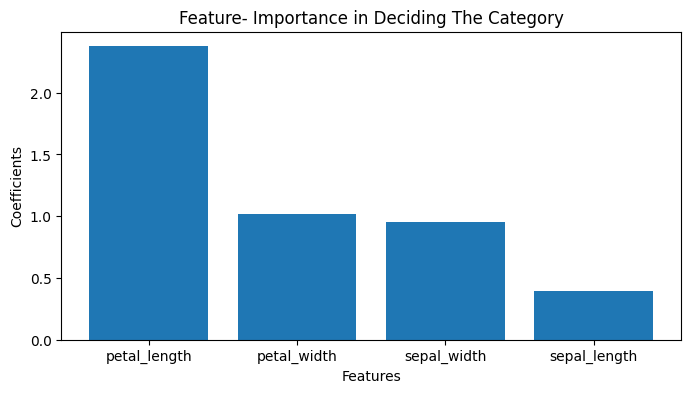

In [41]:
features=X.columns
coefficients=model.coef_[0]

importance=pd.DataFrame({
    'Features':features,
    'Coefficients':abs(coefficients)
})
importance=importance.sort_values(by='Coefficients',ascending=False)
print('Features Importance :\n')
print(importance,'\n')

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.bar(importance['Features'],importance['Coefficients'])
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature- Importance in Deciding The Category')
plt.show()
